In [1]:
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

df = pd.read_csv('/home/nr/Downloads/Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression/USA_Housing.csv')
X = df.drop('Address',axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [3]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))


Max leaf nodes: 5  		 Mean Absolute Error:  87071
Max leaf nodes: 50  		 Mean Absolute Error:  10099
Max leaf nodes: 500  		 Mean Absolute Error:  987
Max leaf nodes: 5000  		 Mean Absolute Error:  565


In [4]:
model = DecisionTreeRegressor(max_leaf_nodes=5000)
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=5000, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [5]:
pred = model.predict(X_test)

In [6]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse =mean_absolute_error(y_test,pred)
mse

558.7979535519037

In [7]:
model.score(X_test,y_test)

0.9999876792544425

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

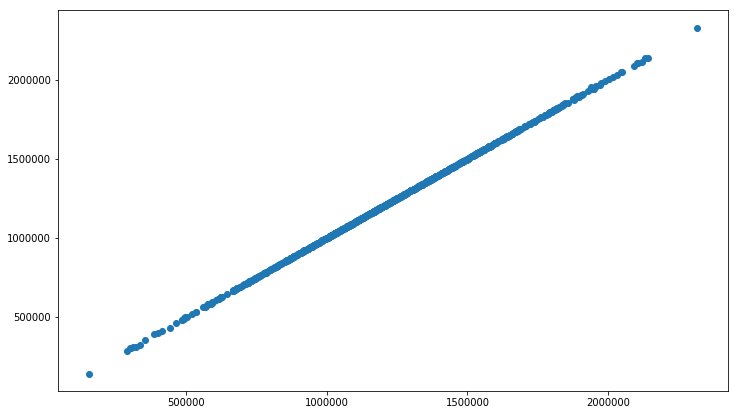

In [9]:
plt.figure(figsize=(12,7))
plt.scatter(y_test,pred)

# Lets try an ensemble model like the RandomForest Regression model

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
model1 = RandomForestRegressor()
model1.fit(X_train,y_train)

/home/nr/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [12]:
pred1 = model1.predict(X_test)

In [13]:
mse1 = mean_absolute_error(y_test,pred1)

In [14]:
mse1

411.6992360417286

In [16]:
model1.score(X_test,y_test)

0.9999942487925305